In [1]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [2]:
n_round = 51

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [3]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")



payload = {"query": {"round": 51}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [4]:
json.dumps(payload)

'{"query": {"round": 51}}'

In [5]:
response

<Response [200]>

In [6]:
response.json()

[{'from_addr': '0x0006f31311c4aa4652c31692d11812c993fda0b2',
  'nft_addr': '0xaf1f019202e87bbc6cc2d9a76ac5f2fcd59620e7',
  'nmse': 3.3519999981,
  'round': 51},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x7170121ee1fc24b384674fd09de84d0864c0dcca',
  'nmse': 5.0770001411,
  'round': 51},
 {'from_addr': '0x0026f79cadcaca0ce94c52881b1b75dc4951ba91',
  'nft_addr': '0xc65c78f0f10fa98a39d68ded8093660436557003',
  'nmse': 6.8870000839,
  'round': 51},
 {'from_addr': '0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5',
  'nft_addr': '0x7cc94f2320502fe1b21983044c6031ae2267d03e',
  'nmse': 2.9649999142,
  'round': 51},
 {'from_addr': '0x00723015a9f5c1db334da1deadb0d935df7cc87b',
  'nft_addr': '0x2487d0c8d8ced17783ff1b06d637b65afdf8157a',
  'nmse': 2.9509999752,
  'round': 51},
 {'from_addr': '0x00d27fafd2351717c76de53d3481406d1d0033a3',
  'nft_addr': '0x1206450c210145e31a330b6143db74ac51e26dad',
  'nmse': 5.7369999886,
  'round': 51},
 {'from_addr': '0x0121478ade27e9eb

In [7]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0006f31311c4aa4652c31692d11812c993fda0b2,0xaf1f019202e87bbc6cc2d9a76ac5f2fcd59620e7,3.352,51
1,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x7170121ee1fc24b384674fd09de84d0864c0dcca,5.077,51
2,0x0026f79cadcaca0ce94c52881b1b75dc4951ba91,0xc65c78f0f10fa98a39d68ded8093660436557003,6.887,51
3,0x002991576a7f917b0a9e3f4cb87b88cd02bacbc5,0x7cc94f2320502fe1b21983044c6031ae2267d03e,2.965,51
4,0x00723015a9f5c1db334da1deadb0d935df7cc87b,0x2487d0c8d8ced17783ff1b06d637b65afdf8157a,2.951,51
...,...,...,...,...
1411,0xfe9758f94d157acc3595aeb36f31bf01cea0c51d,0xdc57d7a69e01b4dec2dadc8b862c63fa421ea9f3,1.000,51
1412,0xfec5999c77b6afd037c311dad7bed4f94a160d80,0xa91c084691e6b3cf11b16b3cc4cf4d0d3b3dcf78,9.925,51
1413,0xff142dd4e4766091cfba78f0342c5ab75388e99a,0x5c1945a18780ef9fe0e691eebf131a47dda6b4ff,4.732,51
1414,0xff620db01e0c9cca29b7f6e2bcc86da07b55b04a,0xa9125dcf22e3d5a5ee70f6c1db6b3f6a60971647,1.000,51


In [8]:
df["from_addr"].nunique()

1202

In [9]:
df[(df["nmse"] < 0.99)] 

,from_addr,nft_addr,nmse,round
22,0x0476cafd443ddf1d145c7d04578c31b7a7e939bc,0x0cd9a5ae30efdd84966f4e21e3f8d87680460759,0.9265,51
28,0x054df776b6850ccfbdbc37a8e4f2a9f34d355e65,0x00e71033b0e3cb4f29653bb68c8d92dd9f212134,0.8924,51
56,0x096f3ad2a7861825ad3d4773cbc61844a92479f6,0x189b077d824a5f26e0c44ff66be0f7ce57d3eb9a,0.3443,51
99,0x1030e96fb9b042ace4ed3055813809e6b3d951cb,0x8fa11c50709edb284e3f48dd2b958191a8fdc1bc,0.8273,51
119,0x135dc7f9181fa9998765c98fb214fd94463b02c3,0xdffdfdfae4c8b81a3713c56ff1503d3979ed3360,0.9783,51
124,0x13e27370efefc693eb908a9be96af4c86d3d0dee,0x9c135eaa04e5e446fe177da3398b961e44dff81e,0.7889,51
185,0x20f1d7ee68ce80d4f52a634c861d1ce763d8b3eb,0x1e10f03619010b61ff178e29e87ad4e634ac064f,0.9353,51
191,0x2227331db0256cfa59cac0ab132a1b7795d87411,0x0bb3436b90941c9759539fdd17f705d30a98cca7,0.6613,51
197,0x236311ff8137f8300ff6505046e99a0d7d2eb2c4,0xc4b7c65fd643232f4e0891b0f1f907077e74bee1,0.4217,51
200,0x243b04d839c3416ec48985132dded1a862cca922,0x8778500f32c003822950f007ac081b03d7a81fd3,0.8377,51


In [10]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

66

In [11]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

57

(0.0, 10.0)

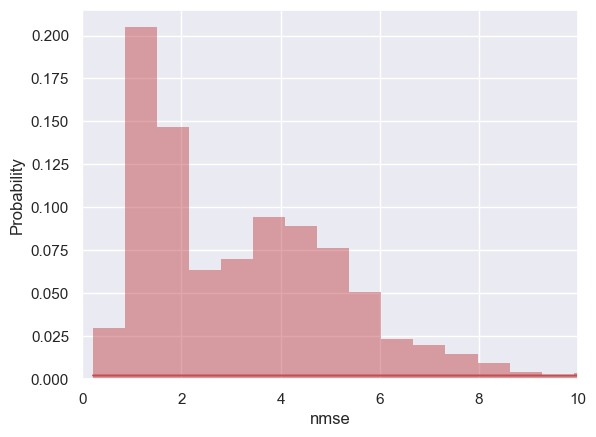

In [15]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [16]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

213

In [20]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.1504237288135593

In [17]:
df[(df["nmse"] == 1)].shape[0]

214

In [18]:
df.shape

(1416, 4)